## Scenario Aziendale: Analisi dei Comportamenti d'Acquisto dei Clienti

### Contesto
Abbiamo una piattaforma e-commerce in rapida crescita specializzata nella vendita di abbigliamento e accessori di moda. Negli ultimi anni, l'azienda ha investito significativamente sia nel proprio sito web che nell'applicazione mobile per migliorare l'esperienza di acquisto dei clienti. Nonostante questi investimenti paralleli, le risorse aziendali per lo sviluppo tecnologico rimangono limitate e il team direttivo deve prendere decisioni strategiche su dove concentrare gli sforzi futuri.

### Situazione Attuale
Il Direttore Marketing ha raccolto dati dettagliati sul comportamento di 500 clienti, monitorando diverse metriche:
- Tempo trascorso sul sito web (in minuti)
- Tempo trascorso sull'app mobile (in minuti)
- Durata dell'iscrizione alla piattaforma (in anni)
- Spesa annuale (in euro)

Il team è particolarmente interessato a comprendere quali fattori influenzino maggiormente il valore economico generato dai clienti, con l'obiettivo di ottimizzare gli investimenti futuri.

### Obiettivi

1. Analizzare i dati per identificare le correlazioni tra le diverse variabili e la spesa annuale
2. Costruire un modello predittivo che possa stimare la spesa annuale dei clienti in base ai loro comportamenti
3. Determinare quale canale (sito web o app mobile) influenza maggiormente le decisioni di acquisto
4. Formulare raccomandazioni concrete per guidare la strategia aziendale

### Domande Specifiche
- Esiste una correlazione significativa tra il tempo trascorso sul sito web e la spesa annuale?
- Esiste una correlazione significativa tra il tempo trascorso sull'app mobile e la spesa annuale?
- Quale variabile ha la correlazione più forte con la spesa annuale?
- Sulla base dei coefficienti del modello, dove l'azienda dovrebbe concentrare i propri investimenti?
- Dovrebbe l'azienda considerare di ridurre gli investimenti in uno dei due canali?

In [2]:
#Importiamo le librerie e leggiamo il dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("CustomerData.csv")
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Qualche statistica del dataset

In [3]:
print(df.describe())

       Avg_Session_Length  Time_on_App  Time_on_Website  Length_of_Membership  \
count          500.000000   500.000000       500.000000            500.000000   
mean            33.053194    12.052488        37.060445              3.533462   
std              0.992563     0.994216         1.010489              0.999278   
min             29.532429     8.508152        33.913847              0.269901   
25%             32.341822    11.388153        36.349257              2.930450   
50%             33.082008    11.983231        37.069367              3.533975   
75%             33.711985    12.753850        37.716432              4.126502   
max             36.139662    15.126994        40.005182              6.922689   

       Yearly_Amount_Spent  
count           500.000000  
mean            499.314038  
std              79.314782  
min             256.670582  
25%             445.038277  
50%             498.887875  
75%             549.313828  
max             765.518462  


Verifichiamo se ci sono valori nulli

In [4]:
print(df.isnull().sum())

Email                   0
Address                 0
Avatar                  0
Avg_Session_Length      0
Time_on_App             0
Time_on_Website         0
Length_of_Membership    0
Yearly_Amount_Spent     0
dtype: int64


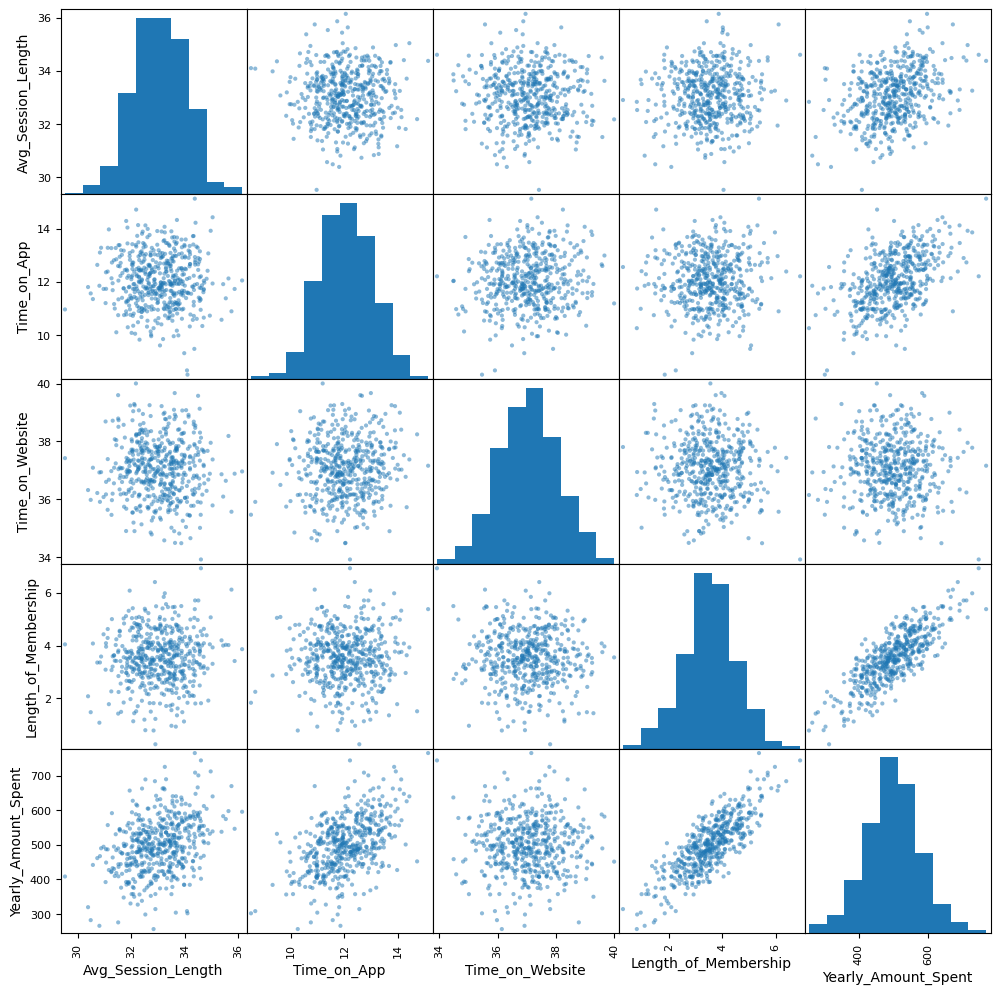

In [5]:
correlazioni = pd.plotting.scatter_matrix(df, figsize=(12, 12))

### Come scegliamo le caratteristiche?

In [6]:
columns = ['Avg_Session_Length', 'Time_on_App',
       'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent']

                      Avg_Session_Length  Time_on_App  Time_on_Website  \
Avg_Session_Length              1.000000    -0.027826        -0.034987   
Time_on_App                    -0.027826     1.000000         0.082388   
Time_on_Website                -0.034987     0.082388         1.000000   
Length_of_Membership            0.060247     0.029143        -0.047582   
Yearly_Amount_Spent             0.355088     0.499328        -0.002641   

                      Length_of_Membership  Yearly_Amount_Spent  
Avg_Session_Length                0.060247             0.355088  
Time_on_App                       0.029143             0.499328  
Time_on_Website                  -0.047582            -0.002641  
Length_of_Membership              1.000000             0.809084  
Yearly_Amount_Spent               0.809084             1.000000  


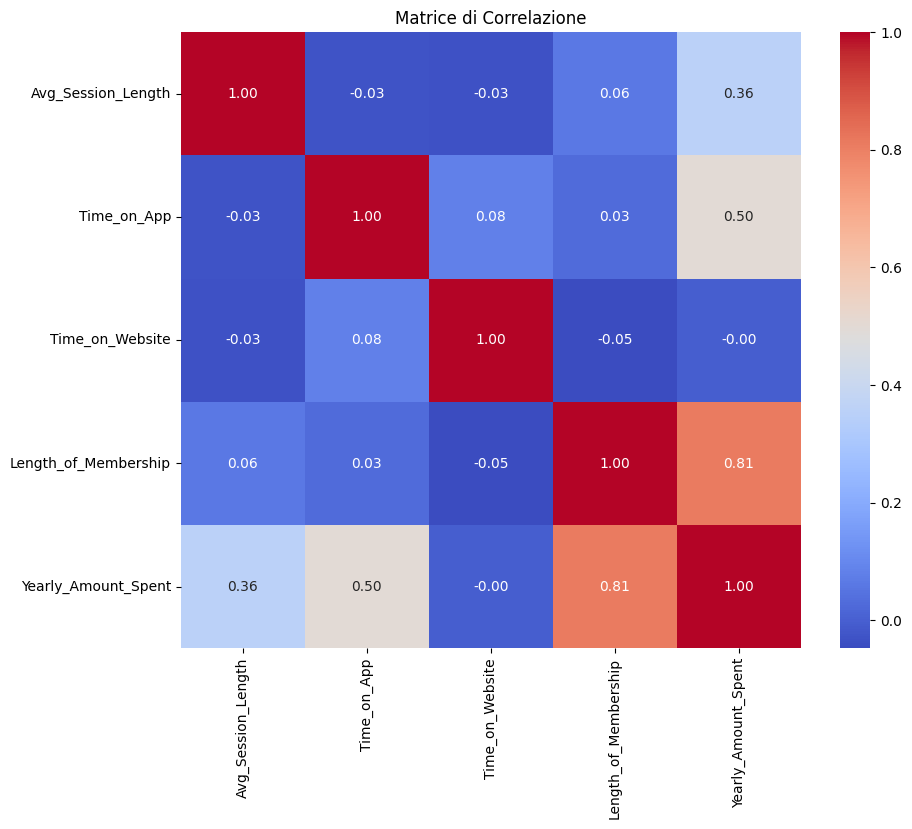

In [7]:
# Matrice di correlazione
corr_matrix = df[columns].corr()
print(corr_matrix)

# Visualizzazione tramite heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di Correlazione')
plt.show()

Time on App e Avg_session_length sembrano ben correlate

In [8]:
X = df[['Time_on_App', 'Length_of_Membership']]
y = df['Yearly_Amount_Spent']

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

print("Pesi:", model.coef_)
print("W_0", model.intercept_)

Pesi: [38.66057465 62.53056614]
W_0 -187.0428145109372


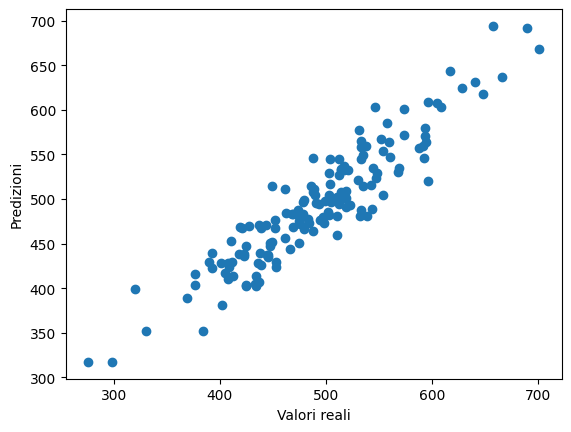

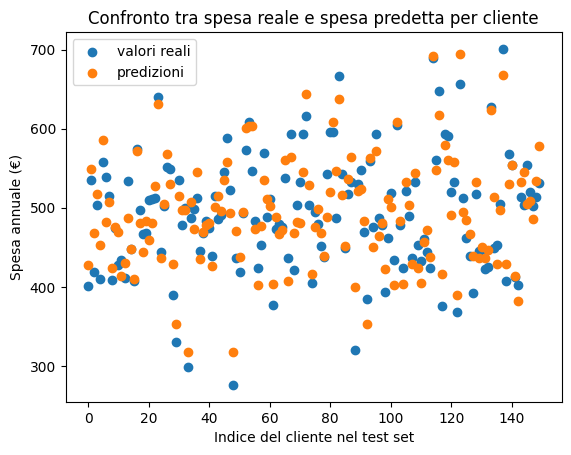

In [10]:
results = model.predict(x_test)
plt.scatter(y_test, results)
plt.xlabel("Valori reali")
plt.ylabel("Predizioni")
plt.show()

plt.scatter(range(len(x_test)), y_test, label='valori reali')
plt.scatter(range(len(x_test)), results, label='predizioni')
plt.xlabel("Indice del cliente nel test set")
plt.ylabel("Spesa annuale (€)")
plt.title("Confronto tra spesa reale e spesa predetta per cliente")
plt.legend()
plt.show()

Calcoliamo l'errore assoluto medio, massimo e varianza sugli errori

1. Errore Assoluto Medio (MAE - Mean Absolute Error)
$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

- Misura la media delle differenze assolute tra valori predetti e valori reali
- È espresso nella stessa unità della variabile target (in questo caso, euro)
- Interpretabile direttamente: "In media, le nostre previsioni sbagliano di X euro"
- Non penalizza gli errori grandi in modo sproporzionato (a differenza dell'errore quadratico)

2. Errore Massimo (Max Error)

$$MaxError = \max |y_i - \hat{y}_i|$$
- Rappresenta la più grande discrepanza tra qualsiasi predizione e il suo corrispondente valore reale
- Identifica il "caso peggiore" di previsione
- Utile per capire quanto può essere grande l'errore in scenari critici
3. Varianza
$$ex\bar{\sigma}^2 = 1 - \frac{\sigma^2(y - \hat{y})}{\sigma^2(y)}$$
dove:
- $y$ sono i target
- $\hat{y}$ sono le predizioni
- $\sigma^2(y - \hat{y})$ è la varianza degli errori
- $\sigma^2(y)$ è la varianza dei valori reali

**Alta varianza spiegata (vicino a 1):**
- Il modello cattura efficacemente i pattern nei dati
- Le variabili indipendenti selezionate sono fortemente predittive
- Le previsioni seguono da vicino i valori reali

**Bassa varianza spiegata (vicino a 0):**
- Il modello non riesce a catturare i pattern significativi
- Le variabili scelte hanno scarso potere predittivo
- Le previsioni non sono molto migliori che indovinare la media



In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, max_error

print('Errore assoluto medio:', mean_absolute_error(y_test, results))
print('Errore massimo:', max_error(y_test, results))
print('Varianza:', explained_variance_score(y_test, results))

Errore assoluto medio: 22.429874842105697
Errore massimo: 79.64060971762746
Varianza: 0.8620242339589204


Proviamo (NON SI FA) cosa succede se mettiamo Time_on_Website (POCO CORRELATA) al posto di Time_on_App 

In [37]:
x = df[['Time_on_Website', 'Avg_Session_Length']]
y = df['Yearly_Amount_Spent']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model.fit(x_train, y_train)

results = model.predict(x_test)

print('Errore assoluto medio:', mean_absolute_error(y_test, results))
print('Errore massimo:', max_error(y_test, results))
print('Varianza:', explained_variance_score(y_test, results))
print("Pesi:", model.coef_)
print("W_0", model.intercept_)

Errore assoluto medio: 54.041350257403
Errore massimo: 200.62398379210867
Varianza: 0.152033439017901
Pesi: [ 0.74394398 28.0920513 ]
W_0 -453.88588742369336


Per capire quanto importante è time_on_Website possiamo rimuovertlo e vedere se il modello peggiora

In [38]:
x = df[['Avg_Session_Length']]
y = df['Yearly_Amount_Spent']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model.fit(x_train, y_train)

results = model.predict(x_test)

print('Errore assoluto medio:', mean_absolute_error(y_test, results))
print('Errore massimo:', max_error(y_test, results))
print('Varianza:', explained_variance_score(y_test, results))
print("Pesi:", model.coef_)
print("W_0", model.intercept_)

Errore assoluto medio: 53.983283921270754
Errore massimo: 201.67873301330906
Varianza: 0.15152311485332648
Pesi: [28.1011805]
W_0 -426.6654822547913


Come ci aspettavamo, i risultati non cambiano. Non essendoci correlazione la variabile Time_on_Website è inutile!

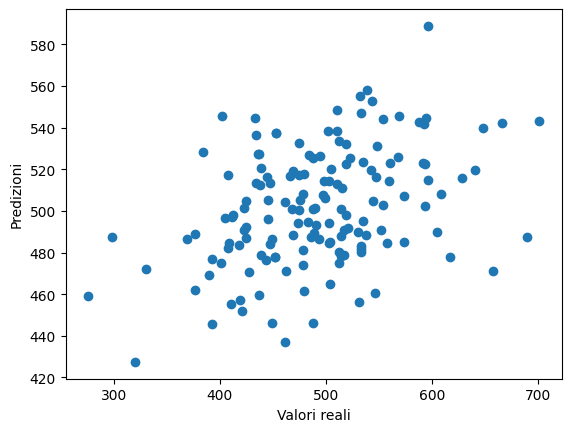

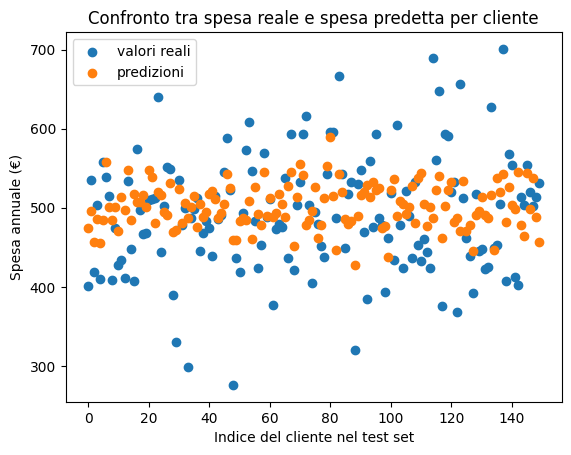

In [14]:
results = model.predict(x_test)
plt.scatter(y_test, results)
plt.xlabel("Valori reali")
plt.ylabel("Predizioni")
plt.show()

plt.scatter(range(len(x_test)), y_test, label='valori reali')
plt.scatter(range(len(x_test)), results, label='predizioni')
plt.xlabel("Indice del cliente nel test set")
plt.ylabel("Spesa annuale (€)")
plt.title("Confronto tra spesa reale e spesa predetta per cliente")
plt.legend()
plt.show()

Errore assoluto medio: 8.426091635451439
Errore massimo: 30.81219005629015
Varianza: 0.9812611652101585


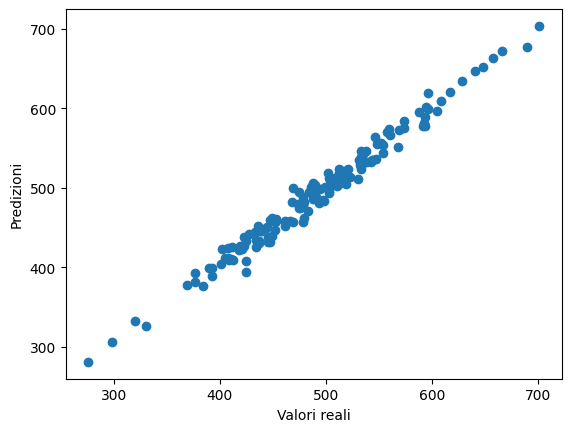

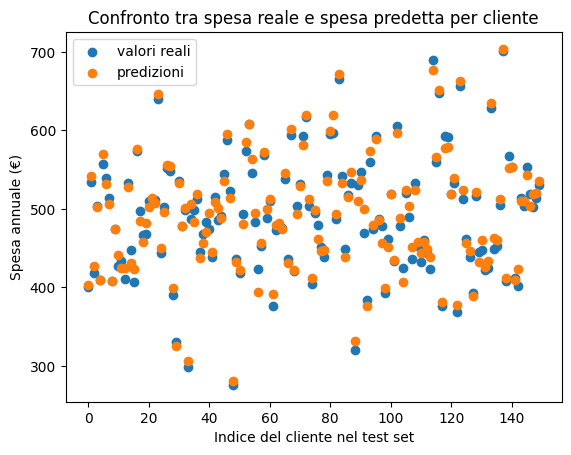

Pesi: [38.59713548 61.67473243  0.45914786 25.72425621]
W_0 -1050.653674321063


AttributeError: 'LinearRegression' object has no attribute 'n_iter_'

In [ ]:
x = df[['Time_on_App', 'Length_of_Membership', 'Time_on_Website', 'Avg_Session_Length' ]]
y = df['Yearly_Amount_Spent']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model.fit(x_train, y_train)
results = model.predict(x_test)

print('Errore assoluto medio:', mean_absolute_error(y_test, results))
print('Errore massimo:', max_error(y_test, results))
print('Varianza:', explained_variance_score(y_test, results))

results = model.predict(x_test)
plt.scatter(y_test, results)
plt.xlabel("Valori reali")
plt.ylabel("Predizioni")
plt.show()

plt.scatter(range(len(x_test)), y_test, label='valori reali')
plt.scatter(range(len(x_test)), results, label='predizioni')
plt.xlabel("Indice del cliente nel test set")
plt.ylabel("Spesa annuale (€)")
plt.title("Confronto tra spesa reale e spesa predetta per cliente")
plt.legend()
plt.show()

Stampiamo i pesi finali

In [ ]:
df[['Time_on_App', 'Length_of_Membership', 'Time_on_Website', 'Avg_Session_Length' ]]
print("Pesi:", model.coef_)
print("W_0", model.intercept_)

Pesi: [38.59713548 61.67473243  0.45914786 25.72425621]
W_0 -1050.653674321063


In [71]:
import numpy as np

def predict(X, weights):
    """
    Calcola le previsioni usando il modello lineare y = X*w.
    
    Parametri:
    X -- matrice di input di shape (m, n+1) con una colonna di 1 aggiunta per il termine di bias
    weights -- vettore dei pesi di shape (n+1, 1)
    
    Restituisce:
    predictions -- vettore delle previsioni di shape (m, 1)
    """
    return np.dot(X, weights)

def compute_cost(X, y, weights):
    """
    Calcola la funzione di costo MSE (Mean Squared Error) per la regressione lineare.
    
    Parametri:
    X -- matrice di input di shape (m, n+1) con una colonna di 1 aggiunta per il termine di bias
    y -- vettore target di shape (m, 1)
    weights -- vettore dei pesi di shape (n+1, 1)
    
    Restituisce:
    cost -- valore dello scarto quadratico medio
    """
    m = X.shape[0]  # numero di esempi
    
    # Calcola le previsioni
    predictions = predict(X, weights)
    
    # Calcola la differenza quadratica
    diff = predictions - y
    squared_diff = np.square(diff)
    
    # Calcola la media degli errori quadratici
    cost = (1/(2*m)) * np.sum(squared_diff)
    
    return cost

def compute_gradient(X, y, weights):
    """
    Calcola il gradiente della funzione di costo rispetto ai pesi.
    
    Parametri:
    X -- matrice di input di shape (m, n+1) con una colonna di 1 aggiunta per il termine di bias
    y -- vettore target di shape (m, 1)
    weights -- vettore dei pesi di shape (n+1, 1)
    
    Restituisce:
    gradient -- vettore del gradiente di shape (n+1, 1)
    """
    m = X.shape[0]  # numero di esempi
    
    # Calcola le previsioni
    predictions = predict(X, weights)
    
    # Calcola le differenze tra previsioni e valori reali
    diff = predictions - y
    
    # Calcola il gradiente
    gradient = (1/m) * np.dot(X.T, diff)
    
    return gradient

def gradient_descent(X, y, weights, learning_rate, num_iterations, print_every=100):
    """
    Esegue l'algoritmo di discesa del gradiente per trovare i pesi ottimali.
    
    Parametri:
    X -- matrice di input di shape (m, n)
    y -- vettore target di shape (m, 1)
    weights -- vettore iniziale dei pesi di shape (n+1, 1)
    learning_rate -- parametro di apprendimento
    num_iterations -- numero di iterazioni
    print_every -- frequenza di stampa dei costi durante l'addestramento
    
    Restituisce:
    weights -- vettore dei pesi ottimizzati
    costs -- lista dei costi per ogni iterazione di stampa
    """
    # Aggiungi colonna di 1 per il termine di bias
    m = X.shape[0]
    X_with_bias = np.c_[np.ones((m, 1)), X]
    
    costs = []
    
    for i in range(num_iterations):
        # Calcola il gradiente
        gradient = compute_gradient(X_with_bias, y, weights)
        
        # Aggiorna i pesi
        weights = weights - learning_rate * gradient
        
        # Calcola e salva il costo ogni print_every iterazioni
        if i % print_every == 0:
            cost = compute_cost(X_with_bias, y, weights)
            costs.append(cost)
            print(f"Iterazione {i}, Errore: {cost}")
            print(f"Iterazione {i}, Pesi: [{', '.join([f'{w[0]:.6f}' for w in weights])}]")

    return weights, costs

# Esempio di utilizzo
def run_linear_regression(X, y, learning_rate=0.01, num_iterations=1000):
    """
    Esegue la regressione lineare su X e y.
    
    Parametri:
    X -- matrice di input di shape (m, n)
    y -- vettore target di shape (m, 1)
    learning_rate -- parametro di apprendimento
    num_iterations -- numero di iterazioni
    
    Restituisce:
    weights -- vettore dei pesi ottimizzati
    costs -- lista dei costi
    """
    # Inizializza i pesi a zero
    n = X.shape[1]  # numero di feature
    weights = np.zeros((n + 1, 1))  # +1 per il termine di bias
    
    # Esegui la discesa del gradiente
    final_weights, costs = gradient_descent(X, y, weights, learning_rate, num_iterations)
    print("\n Errore Finale")
    print(f"Errore: {costs[-1]}")
    print("\nPesi finali:")
    print(f"w_0 (intercetta): {final_weights[0][0]}")
    for i in range(1, len(final_weights)):
        print(f"w_{i}: {final_weights[i][0]}")
    
    return final_weights, costs

In [72]:
X = df[['Time_on_App', 'Length_of_Membership', 'Time_on_Website', 'Avg_Session_Length']].values
y = df['Yearly_Amount_Spent'].values.reshape(-1, 1)
# Esegui la regressione lineare
weights, costs = run_linear_regression(X, y, learning_rate=0.0001, num_iterations=100000)

Iterazione 0, Errore: 70808.39259103363
Iterazione 0, Pesi: [0.049931, 0.605727, 0.182830, 1.850459, 1.653182]
Iterazione 100, Errore: 2825.0725547178417
Iterazione 100, Pesi: [0.186019, 2.611163, 1.292928, 6.823776, 6.372225]
Iterazione 200, Errore: 2772.7551748114333
Iterazione 200, Pesi: [0.181760, 2.921265, 1.900563, 6.596142, 6.449545]
Iterazione 300, Errore: 2721.505748251338
Iterazione 300, Pesi: [0.177503, 3.228388, 2.501939, 6.370980, 6.525847]
Iterazione 400, Errore: 2671.3024305709914
Iterazione 400, Pesi: [0.173249, 3.532563, 3.097121, 6.148264, 6.601144]
Iterazione 500, Errore: 2622.1238250538763
Iterazione 500, Pesi: [0.168998, 3.833817, 3.686174, 5.927968, 6.675449]
Iterazione 600, Errore: 2573.9489735360694
Iterazione 600, Pesi: [0.164750, 4.132179, 4.269160, 5.710064, 6.748774]
Iterazione 700, Errore: 2526.7573473981424
Iterazione 700, Pesi: [0.160504, 4.427674, 4.846143, 5.494528, 6.821131]
Iterazione 800, Errore: 2480.528838742503
Iterazione 800, Pesi: [0.156261, 4.7

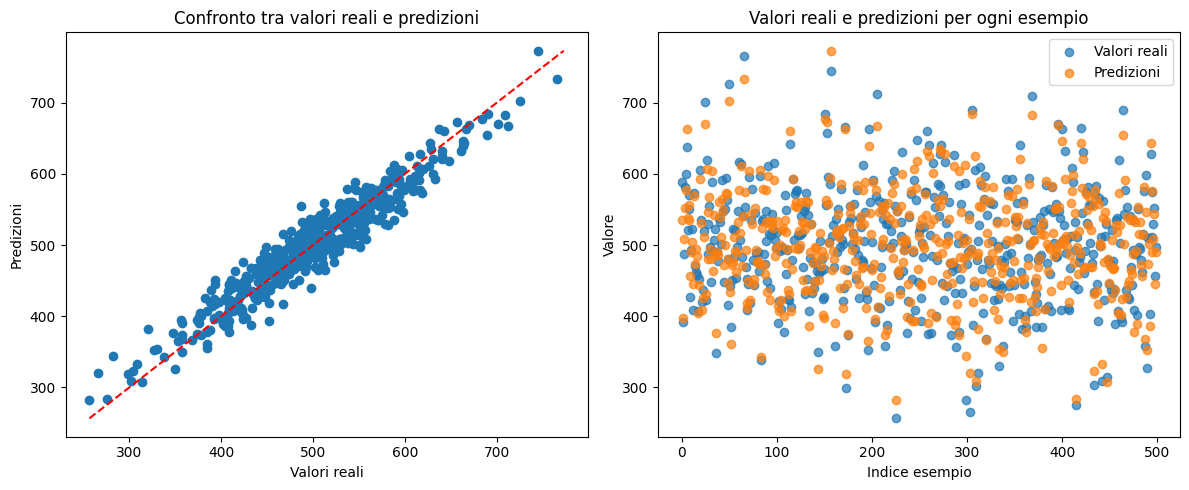

Errore assoluto medio: 18.1598911802755
Errore massimo: 67.14511179878815
Varianza spiegata: 0.9185119153092629


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions_comparison(X, y, weights):
    m = X.shape[0]
    X_with_bias = np.c_[np.ones((m, 1)), X]
    
    # Calcola le predizioni
    y_pred = np.dot(X_with_bias, weights)
    
    # Grafico 1: Valori reali vs Predizioni (scatter plot)
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y, y_pred)
    plt.xlabel("Valori reali")
    plt.ylabel("Predizioni")
    plt.title("Confronto tra valori reali e predizioni")
    
    # Retta di perfetta predizione - bisettrice
    min_val = min(np.min(y), np.min(y_pred))
    max_val = max(np.max(y), np.max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    
    # Grafico 2: Valori reali e predizioni per ciascun esempio
    plt.subplot(1, 2, 2)
    plt.scatter(range(len(y)), y, label='Valori reali', alpha=0.7)
    plt.scatter(range(len(y_pred)), y_pred, label='Predizioni', alpha=0.7)
    plt.xlabel("Indice esempio")
    plt.ylabel("Valore")
    plt.legend()
    plt.title("Valori reali e predizioni per ogni esempio")
    
    plt.tight_layout()
    plt.show()

# Calcola e visualizza l'errore medio assoluto
def print_error_metrics(X, y, weights):
    m = X.shape[0]
    X_with_bias = np.c_[np.ones((m, 1)), X]
    
    # Calcola le predizioni
    y_pred = np.dot(X_with_bias, weights)
    
    # Calcola errore assoluto medio
    mae = np.mean(np.abs(y - y_pred))
    
    # Calcola errore massimo
    max_error = np.max(np.abs(y - y_pred))
    
    y_mean = np.mean(y)
    ss_tot = np.sum((y - y_mean) ** 2)
    ss_res = np.sum((y - y_pred) ** 2)
    variance_explained = 1 - (ss_res / ss_tot)
    
    print(f'Errore assoluto medio: {mae}')
    print(f'Errore massimo: {max_error}')
    print(f'Varianza: {variance_explained}')

# Chiamate alle funzioni
plot_predictions_comparison(X, y, weights)
print_error_metrics(X, y, weights)